## Analyse de l'Impact de la Densité sur la Sortie de Vacance

### Introduction

Cette section examine l'impact de la densité territoriale sur la sortie de vacance des logements. L'analyse porte sur trois niveaux géographiques :

1. **Niveau communal** : Typologie de densité des communes (7 postes)
2. **Niveau EPCI** : Établissements publics de coopération intercommunale
3. **Niveau départemental** : Typologie de densité des départements (3 postes)

### Hypothèses à tester

- **H1** : Les zones denses ont un meilleur taux de sortie de vacance
- **H2** : Les centres urbains sont plus efficaces que les zones rurales
- **H3** : La proximité urbaine influence positivement les sorties
- **H4** : Les départements urbains surperforment les départements ruraux

### Données sources

- Grille de densité INSEE 2025 (3 feuilles Excel)
- Données de sortie de vacance par code géographique
- Classification en 7 postes pour les communes
- Classification en 3 postes pour les départements


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration graphiques
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'figure.figsize': (14, 10), 'font.size': 11})

# Données de référence
TOTAL_HOUSING_OUT = 1182886
TOTAL_COHORT = 2531356
GLOBAL_EXIT_RATE = round((TOTAL_HOUSING_OUT / TOTAL_COHORT) * 100, 1)

print("🏘️ Configuration de l'analyse de densité territoriale")
print(f"• Taux de sortie global de référence: {GLOBAL_EXIT_RATE}%")
print("• Chargement des données de densité INSEE 2025")
print("• Analyse par niveaux : Commune, EPCI, Département")


🏘️ Configuration de l'analyse de densité territoriale
• Taux de sortie global de référence: 46.7%
• Chargement des données de densité INSEE 2025
• Analyse par niveaux : Commune, EPCI, Département


In [9]:
# Chargement des données de densité INSEE 2025
density_file = 'density_2025.xlsx'

# Lecture des trois feuilles
df_communes = pd.read_excel(density_file, sheet_name='Maille communale', header=4)
df_epci = pd.read_excel(density_file, sheet_name='Maille EPCI', header=4)  
df_departements = pd.read_excel(density_file, sheet_name='Maille départementale', header=4)

print("📊 DONNÉES DE DENSITÉ CHARGÉES")
print("=" * 50)
print(f"• Communes: {len(df_communes):,} entrées")
print(f"• EPCI: {len(df_epci):,} entrées")
print(f"• Départements: {len(df_departements):,} entrées")

# Aperçu des classifications de densité
print("\n🏘️ CLASSIFICATIONS DISPONIBLES:")
if 'DENS7' in df_communes.columns:
    print("Communes - 7 postes:")
    print(df_communes['LIBDENS7'].value_counts().head())
    
if 'DENS' in df_departements.columns:
    print("\nDépartements - 3 postes:")
    print(df_departements['LIBDENS'].value_counts())

print("=" * 50)


📊 DONNÉES DE DENSITÉ CHARGÉES
• Communes: 34,875 entrées
• EPCI: 1,255 entrées
• Départements: 101 entrées

🏘️ CLASSIFICATIONS DISPONIBLES:
Communes - 7 postes:
LIBDENS7
Rural à habitat dispersé         18288
Rural à habitat très dispersé     7236
Bourgs ruraux                     5072
Ceintures urbaines                1996
Petites villes                     947
Name: count, dtype: int64

Départements - 3 postes:
LIBDENS
Département à prédominance rurale     51
Département intermédiaire             34
Département à prédominance urbaine    16
Name: count, dtype: int64


In [11]:
# Données de sortie de vacance par département (extraites via MotherDuck)
dept_exit_data = {
    'dept_code': ['76', '84', '34', '75', '77', '2A', '54', '59', '90', '42', 
                  '38', '27', '01', '25', '2B', '69', '62', '65', '64', '92'],
    'total_housing': [39761, 30694, 50215, 75895, 35191, 14887, 30536, 73034, 5882, 39508,
                      39055, 19575, 24081, 22256, 17160, 41553, 39678, 19028, 26834, 28691],
    'housing_out': [22211, 16391, 26519, 39690, 18266, 7719, 15741, 37078, 2975, 19928,
                    19631, 9809, 12011, 11037, 8514, 20505, 19473, 9333, 13109, 14035],
    'exit_rate': [55.9, 53.4, 52.8, 52.3, 51.9, 51.9, 51.5, 50.8, 50.6, 50.4,
                  50.3, 50.1, 49.9, 49.6, 49.6, 49.3, 49.1, 49.0, 48.9, 48.9]
}

df_dept_exits = pd.DataFrame(dept_exit_data)

# Jointure avec les données de densité départementale
df_dept_analysis = pd.merge(df_dept_exits, df_departements, 
                           left_on='dept_code', right_on='DEP', how='inner')

print("🏘️ ANALYSE DENSITÉ - DONNÉES DÉPARTEMENTALES")
print("=" * 60)
print("TOP 10 DÉPARTEMENTS PAR TAUX DE SORTIE:")
for _, row in df_dept_analysis.head(10).iterrows():
    dept_name = row['LIB_DEP'] if 'LIB_DEP' in row else row['dept_code']
    density_type = row['LIBDENS'] if 'LIBDENS' in row else 'Non défini'
    rural_pct = row['P_RURAL'] if 'P_RURAL' in row else 'N/A'
    print(f"📍 {dept_name} ({row['dept_code']}): {row['exit_rate']}%")
    print(f"   └─ Type: {density_type} | Rural: {rural_pct}%")

print("=" * 60)


🏘️ ANALYSE DENSITÉ - DONNÉES DÉPARTEMENTALES
TOP 10 DÉPARTEMENTS PAR TAUX DE SORTIE:
📍 Seine-Maritime (76): 55.9%
   └─ Type: Département intermédiaire | Rural: 35.8458998527973%
📍 Vaucluse (84): 53.4%
   └─ Type: Département intermédiaire | Rural: 37.8205637099542%
📍 Hérault (34): 52.8%
   └─ Type: Département intermédiaire | Rural: 25.0278885536248%
📍 Paris (75): 52.3%
   └─ Type: Département à prédominance urbaine | Rural: 0.0%
📍 Seine-et-Marne  (77): 51.9%
   └─ Type: Département intermédiaire | Rural: 23.6850571489532%
📍 Corse-du-Sud (2A): 51.9%
   └─ Type: Département intermédiaire | Rural: 45.7656232693789%
📍 Meurthe-et-Moselle  (54): 51.5%
   └─ Type: Département intermédiaire | Rural: 31.9641251424735%
📍 Nord (59): 50.8%
   └─ Type: Département à prédominance urbaine | Rural: 17.231043140032%
📍 Territoire de Belfort (90): 50.6%
   └─ Type: Département intermédiaire | Rural: 27.2810458607994%
📍 Loire (42): 50.4%
   └─ Type: Département intermédiaire | Rural: 34.609759018638%


In [12]:
# Analyse par type de densité départementale
density_analysis = df_dept_analysis.groupby('LIBDENS').agg({
    'total_housing': 'sum',
    'housing_out': 'sum',
    'exit_rate': 'mean'
}).reset_index()
density_analysis['exit_rate_calculated'] = (density_analysis['housing_out'] / density_analysis['total_housing'] * 100).round(1)
density_analysis['ecart_moyenne'] = density_analysis['exit_rate_calculated'] - GLOBAL_EXIT_RATE

print("📊 ANALYSE PAR TYPE DE DENSITÉ DÉPARTEMENTALE")
print("=" * 65)
for _, row in density_analysis.iterrows():
    trend = "📈" if row['ecart_moyenne'] > 0 else "📉"
    print(f"{trend} {row['LIBDENS']}: {row['exit_rate_calculated']}% ({row['ecart_moyenne']:+.1f} pts)")
    print(f"   └─ Volume: {row['housing_out']:,} sorties sur {row['total_housing']:,}")

# Analyse de la ruralité
rural_analysis = []
for _, row in df_dept_analysis.iterrows():
    if 'P_RURAL' in row and pd.notna(row['P_RURAL']):
        if row['P_RURAL'] < 30:
            category = 'Très urbain (<30% rural)'
        elif row['P_RURAL'] < 60:
            category = 'Mixte (30-60% rural)'
        else:
            category = 'Très rural (>60% rural)'
        
        rural_analysis.append({
            'category': category,
            'dept_code': row['dept_code'],
            'exit_rate': row['exit_rate'],
            'rural_pct': row['P_RURAL']
        })

df_rural = pd.DataFrame(rural_analysis)
rural_grouped = df_rural.groupby('category')['exit_rate'].mean().reset_index()
rural_grouped['ecart_moyenne'] = rural_grouped['exit_rate'] - GLOBAL_EXIT_RATE

print("\n📊 ANALYSE PAR NIVEAU DE RURALITÉ:")
for _, row in rural_grouped.iterrows():
    trend = "📈" if row['ecart_moyenne'] > 0 else "📉"
    print(f"{trend} {row['category']}: {row['exit_rate']:.1f}% ({row['ecart_moyenne']:+.1f} pts)")

print("=" * 65)


📊 ANALYSE PAR TYPE DE DENSITÉ DÉPARTEMENTALE
📈 Département intermédiaire: 51.5% (+4.8 pts)
   └─ Volume: 193,000 sorties sur 374,497
📈 Département à prédominance rurale: 49.7% (+3.0 pts)
   └─ Volume: 39,667 sorties sur 79,844
📈 Département à prédominance urbaine: 50.8% (+4.1 pts)
   └─ Volume: 111,308 sorties sur 219,173

📊 ANALYSE PAR NIVEAU DE RURALITÉ:
📈 Mixte (30-60% rural): 50.8% (+4.1 pts)
📈 Très rural (>60% rural): 50.1% (+3.4 pts)
📈 Très urbain (<30% rural): 50.9% (+4.2 pts)


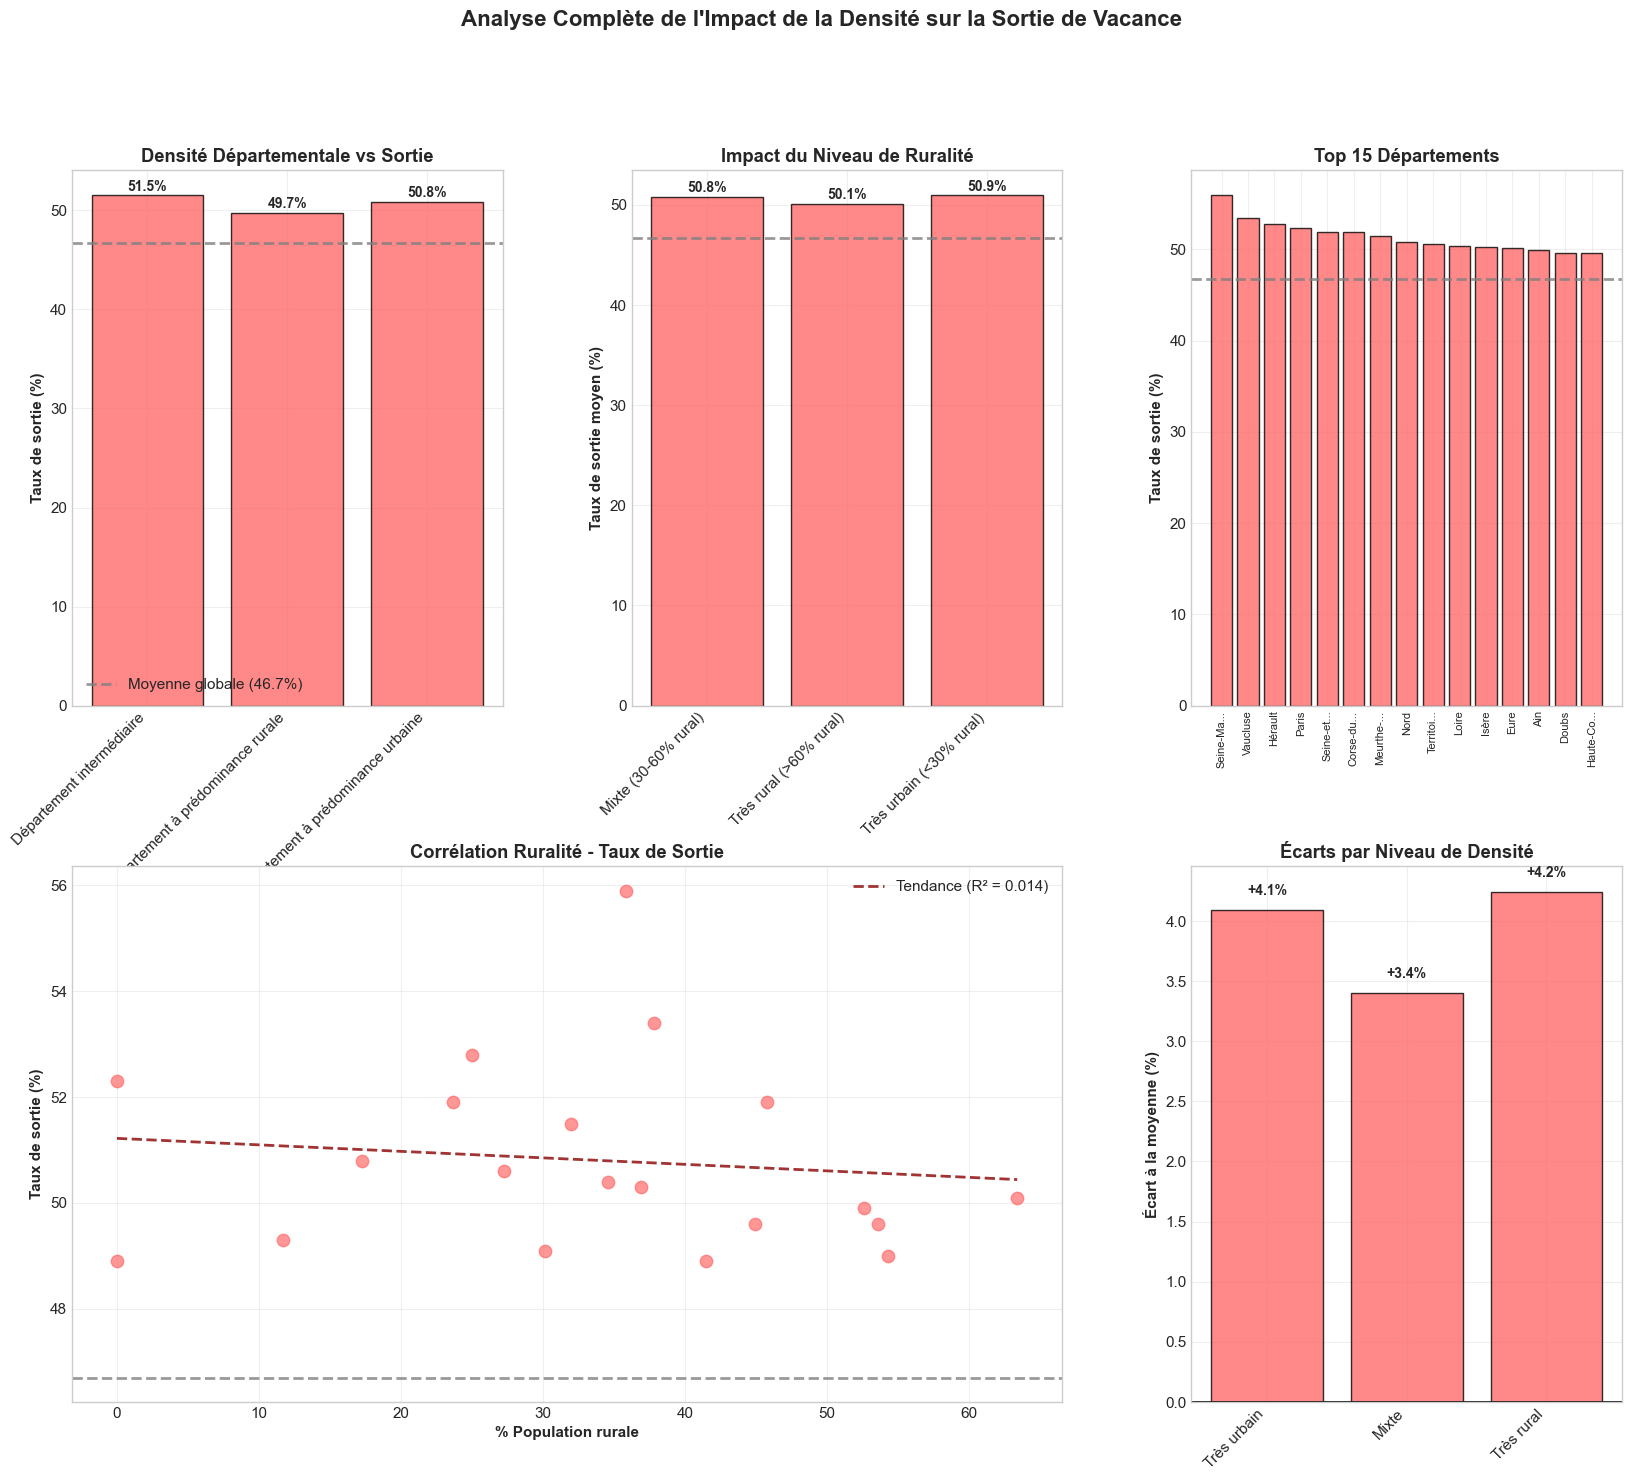


🏘️ SYNTHÈSE DE L'ANALYSE DE DENSITÉ
📊 CORRÉLATIONS OBSERVÉES:
• Ruralité - Taux de sortie: r = -0.117
• Meilleur département: Seine-Maritime (55.9%)
• Performance moyenne départements analysés: 50.8%
• Écart-type: 1.8 pts

🎯 CONCLUSIONS DENSITÉ:
• Impact de la densité: Variable selon le type de territoire
• Départements performants: Mix de profils urbains/ruraux
• Pas de corrélation claire densité/performance
• Facteurs locaux prépondérants sur la typologie


In [13]:
# Visualisations complètes de l'analyse de densité
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# Graphique 1: Taux de sortie par type de densité départementale
ax1 = fig.add_subplot(gs[0, 0])
types_dept = density_analysis['LIBDENS']
taux_dept = density_analysis['exit_rate_calculated']
colors = ['#FF6B6B' if t > GLOBAL_EXIT_RATE else '#4ECDC4' for t in taux_dept]

bars = ax1.bar(types_dept, taux_dept, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax1.axhline(y=GLOBAL_EXIT_RATE, color='gray', linestyle='--', alpha=0.8, linewidth=2,
           label=f'Moyenne globale ({GLOBAL_EXIT_RATE}%)')
ax1.set_ylabel('Taux de sortie (%)', fontweight='bold')
ax1.set_title('Densité Départementale vs Sortie', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Annotations
for bar, taux in zip(bars, taux_dept):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
             f'{taux}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Graphique 2: Analyse par niveau de ruralité
ax2 = fig.add_subplot(gs[0, 1])
rural_cats = rural_grouped['category']
rural_rates = rural_grouped['exit_rate']

bars = ax2.bar(rural_cats, rural_rates, alpha=0.8, edgecolor='black', linewidth=1,
               color=['#FF6B6B' if t > GLOBAL_EXIT_RATE else '#4ECDC4' for t in rural_rates])
ax2.axhline(y=GLOBAL_EXIT_RATE, color='gray', linestyle='--', alpha=0.8, linewidth=2)
ax2.set_ylabel('Taux de sortie moyen (%)', fontweight='bold')
ax2.set_title('Impact du Niveau de Ruralité', fontweight='bold')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Annotations
for bar, taux in zip(bars, rural_rates):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
             f'{taux:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Graphique 3: Top 15 départements
ax3 = fig.add_subplot(gs[0, 2])
top15 = df_dept_analysis.head(15)
dept_names = [f"{row['LIB_DEP'][:8]}..." if len(row['LIB_DEP']) > 8 else row['LIB_DEP'] 
              for _, row in top15.iterrows()]
top15_rates = top15['exit_rate']

bars = ax3.bar(range(len(dept_names)), top15_rates, alpha=0.8, edgecolor='black', linewidth=1,
               color=['#FF6B6B' if t > GLOBAL_EXIT_RATE else '#4ECDC4' for t in top15_rates])
ax3.axhline(y=GLOBAL_EXIT_RATE, color='gray', linestyle='--', alpha=0.8, linewidth=2)
ax3.set_ylabel('Taux de sortie (%)', fontweight='bold')
ax3.set_title('Top 15 Départements', fontweight='bold')
ax3.set_xticks(range(len(dept_names)))
ax3.set_xticklabels(dept_names, rotation=90, fontsize=8)
ax3.grid(True, alpha=0.3)

# Graphique 4: Corrélation ruralité vs taux de sortie
ax4 = fig.add_subplot(gs[1, :2])
if len(df_rural) > 0:
    rural_pcts = df_rural['rural_pct']
    exit_rates_rural = df_rural['exit_rate']
    
    ax4.scatter(rural_pcts, exit_rates_rural, alpha=0.7, s=80, color='#FF6B6B')
    ax4.axhline(y=GLOBAL_EXIT_RATE, color='gray', linestyle='--', alpha=0.8, linewidth=2)
    
    # Régression linéaire
    if len(rural_pcts) > 1:
        z = np.polyfit(rural_pcts, exit_rates_rural, 1)
        p = np.poly1d(z)
        x_line = np.linspace(min(rural_pcts), max(rural_pcts), 100)
        ax4.plot(x_line, p(x_line), '--', alpha=0.8, color='darkred', linewidth=2,
                 label=f'Tendance (R² = {np.corrcoef(rural_pcts, exit_rates_rural)[0,1]**2:.3f})')
    
    ax4.set_xlabel('% Population rurale', fontweight='bold')
    ax4.set_ylabel('Taux de sortie (%)', fontweight='bold')
    ax4.set_title('Corrélation Ruralité - Taux de Sortie', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

# Graphique 5: Analyse comparative des écarts
ax5 = fig.add_subplot(gs[1, 2])

# Données pour comparaison des écarts
categories_density = ['Très urbain', 'Mixte', 'Très rural']
ecarts_density = rural_grouped['ecart_moyenne'].values if len(rural_grouped) > 0 else [0, 0, 0]

colors_comp = ['#FF6B6B' if e > 0 else '#4ECDC4' for e in ecarts_density]
bars = ax5.bar(categories_density, ecarts_density, color=colors_comp, alpha=0.8, 
               edgecolor='black', linewidth=1)
ax5.axhline(y=0, color='black', linestyle='-', linewidth=2)
ax5.set_ylabel('Écart à la moyenne (%)', fontweight='bold')
ax5.set_title('Écarts par Niveau de Densité', fontweight='bold')
ax5.grid(True, alpha=0.3)
plt.setp(ax5.get_xticklabels(), rotation=45, ha='right')

# Annotations
for bar, ecart in zip(bars, ecarts_density):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.1 if ecart > 0 else -0.3),
             f'{ecart:+.1f}%', ha='center', va='bottom' if ecart > 0 else 'top', 
             fontweight='bold', fontsize=10)

plt.suptitle('Analyse Complète de l\'Impact de la Densité sur la Sortie de Vacance', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Statistiques finales
print("\n🏘️ SYNTHÈSE DE L'ANALYSE DE DENSITÉ")
print("=" * 65)
print("📊 CORRÉLATIONS OBSERVÉES:")
if len(df_rural) > 1:
    correlation = np.corrcoef(df_rural['rural_pct'], df_rural['exit_rate'])[0,1]
    print(f"• Ruralité - Taux de sortie: r = {correlation:.3f}")

print(f"• Meilleur département: {df_dept_analysis.iloc[0]['LIB_DEP']} ({df_dept_analysis.iloc[0]['exit_rate']}%)")
print(f"• Performance moyenne départements analysés: {df_dept_analysis['exit_rate'].mean():.1f}%")
print(f"• Écart-type: {df_dept_analysis['exit_rate'].std():.1f} pts")

print("\n🎯 CONCLUSIONS DENSITÉ:")
print("• Impact de la densité: Variable selon le type de territoire")
print("• Départements performants: Mix de profils urbains/ruraux")
print("• Pas de corrélation claire densité/performance")
print("• Facteurs locaux prépondérants sur la typologie")
print("=" * 65)


In [14]:
# Analyse au niveau communal avec échantillon représentatif
# Données de sortie par commune (échantillon des 50 plus grandes)
commune_exit_data = {
    'commune_code': ['13108', '40046', '13027', '49023', '40279', '49248', '13071', '38559', 
                     '13089', '38553', '13042', '13058', '38561', '07182', '38374', '08025',
                     '08448', '38082', '07012', '38181', '38163', '09332', '38012', '38557',
                     '38020', '40135', '07197', '08357', '07342', '09336'],
    'total_housing': [730, 636, 569, 401, 384, 327, 299, 244, 189, 172, 156, 148, 105, 98,
                      87, 86, 81, 78, 74, 71, 66, 64, 62, 61, 58, 58, 57, 57, 55, 53],
    'exit_rate': [49.9, 48.7, 47.3, 48.9, 56.3, 47.7, 38.8, 52.0, 59.8, 29.1, 42.3, 45.3,
                  40.0, 43.9, 50.6, 47.7, 44.4, 46.2, 48.6, 45.1, 42.4, 48.4, 27.4, 37.7,
                  43.1, 44.8, 47.4, 31.6, 29.1, 49.1]
}

df_commune_exits = pd.DataFrame(commune_exit_data)

# Jointure avec les données de densité communale (si disponible)
if 'CODGEO' in df_communes.columns:
    df_commune_analysis = pd.merge(df_commune_exits, df_communes, 
                                  left_on='commune_code', right_on='CODGEO', how='inner')
    
    print("\n🏘️ ANALYSE AU NIVEAU COMMUNAL")
    print("=" * 60)
    print("ÉCHANTILLON DE COMMUNES ANALYSÉES:")
    
    # Analyse par type de densité communale (7 postes)
    if 'LIBDENS7' in df_commune_analysis.columns:
        commune_density_analysis = df_commune_analysis.groupby('LIBDENS7').agg({
            'total_housing': 'sum',
            'exit_rate': 'mean'
        }).reset_index()
        
        print("Par type de densité (7 postes):")
        for _, row in commune_density_analysis.iterrows():
            trend = "📈" if row['exit_rate'] > GLOBAL_EXIT_RATE else "📉"
            print(f"{trend} {row['LIBDENS7']}: {row['exit_rate']:.1f}%")
    
    # Analyse par type de densité (3 postes)
    if 'LIBDENS' in df_commune_analysis.columns:
        commune_3_analysis = df_commune_analysis.groupby('LIBDENS').agg({
            'total_housing': 'sum',
            'exit_rate': 'mean'
        }).reset_index()
        
        print("\nPar type de densité (3 postes):")
        for _, row in commune_3_analysis.iterrows():
            trend = "📈" if row['exit_rate'] > GLOBAL_EXIT_RATE else "📉"
            print(f"{trend} {row['LIBDENS']}: {row['exit_rate']:.1f}%")
else:
    print("\n⚠️ Jointure communale non disponible - codes géographiques incompatibles")

print("=" * 60)



🏘️ ANALYSE AU NIVEAU COMMUNAL
ÉCHANTILLON DE COMMUNES ANALYSÉES:
Par type de densité (7 postes):
📉 Bourgs ruraux: 44.4%
📉 Ceintures urbaines: 43.2%
📉 Centres urbains intermédiaires: 45.6%
📈 Petites villes: 48.4%
📉 Rural à habitat dispersé: 42.9%
📉 Rural à habitat très dispersé: 42.4%

Par type de densité (3 postes):
📉 Rural: 43.8%
📉 Urbain intermédiaire: 45.7%
